In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# ver porque n foi o parse_dates
df = pd.read_csv('dados_limpos.csv',encoding = 'latin1',parse_dates = ['DATA'])

In [67]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DAY
0,2016,1,ACIR GURGACZ,Alugel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60,13
1,2016,1,ACIR GURGACZ,Alugel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84,18
2,2016,1,ACIR GURGACZ,Alugel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,1
3,2016,1,ACIR GURGACZ,Alugel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48,16
4,2016,1,ACIR GURGACZ,Locação,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00,1


In [131]:
df.dtypes

ANO                           int64
MES                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
DAY                           int64
ANO_MES                      object
dtype: object

In [81]:
senadores_com_mais_gastos = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum()
senadores_com_mais_gastos = senadores_com_mais_gastos.sort_values(ascending = False)

In [164]:
my_color = np.where(senadores_com_mais_gastos.head(10)>500000, 'r','b')

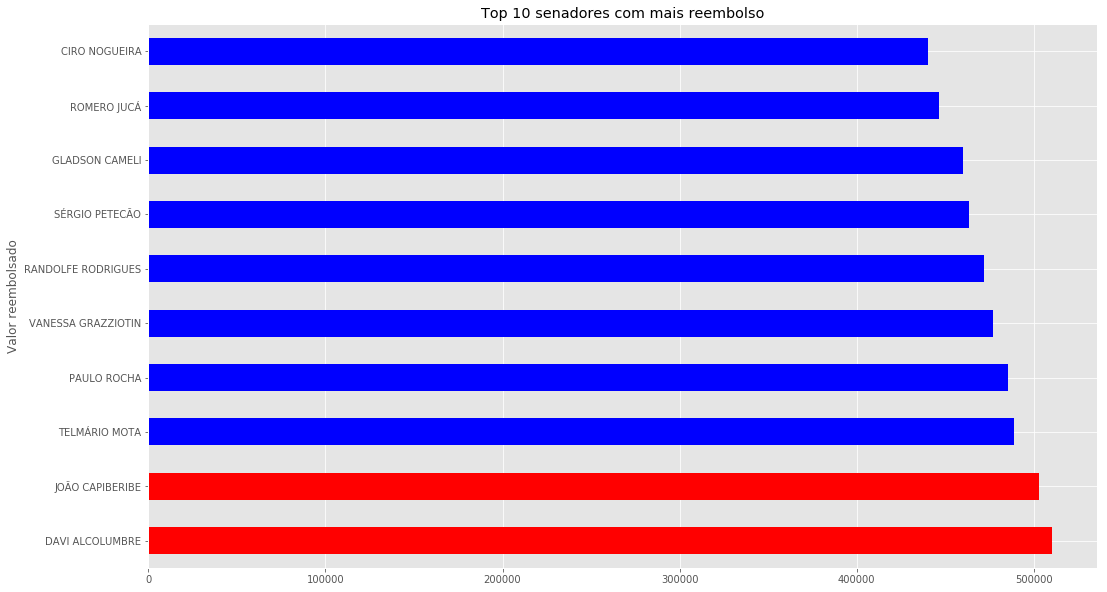

In [165]:

senadores_com_mais_gastos.head(10).plot(kind = 'barh',color = my_color,figsize=(17,10))
plt.title('Top 10 senadores com mais reembolso')
plt.ylabel('Valor reembolsado')
plt.savefig('top_10_gastos.png')
plt.show()

<function matplotlib.pyplot.show>

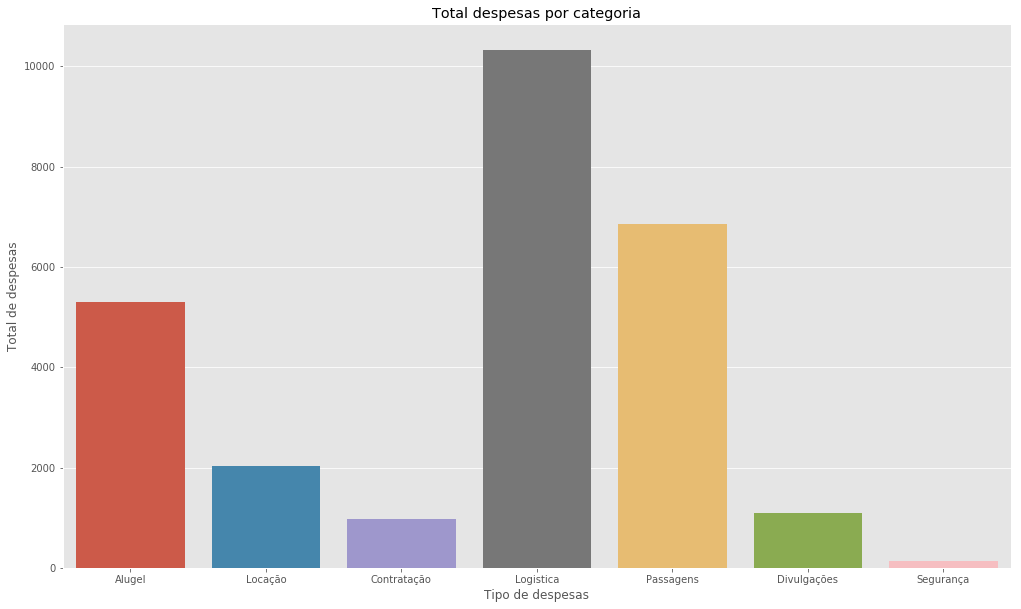

In [160]:
plt.figure(figsize = (17,10))

sns.countplot(x = df['TIPO_DESPESA'])
plt.title('Total despesas por categoria')
plt.ylabel('Total de despesas')
plt.xlabel('Tipo de despesas')
plt.style.use('ggplot')
plt.show


In [124]:
df['ANO_MES'] = df['DATA'].dt.strftime('%Y-%m')

In [140]:
df.loc[0,'ANO']

2016

In [153]:
pivot_df = df.pivot_table(index = 'ANO_MES',columns= 'TIPO_DESPESA',values = 'VALOR_REEMBOLSADO',aggfunc = np.count_nonzero, fill_value = 0)
pivot_df = pivot_df.loc['2016-01':'2016-12']

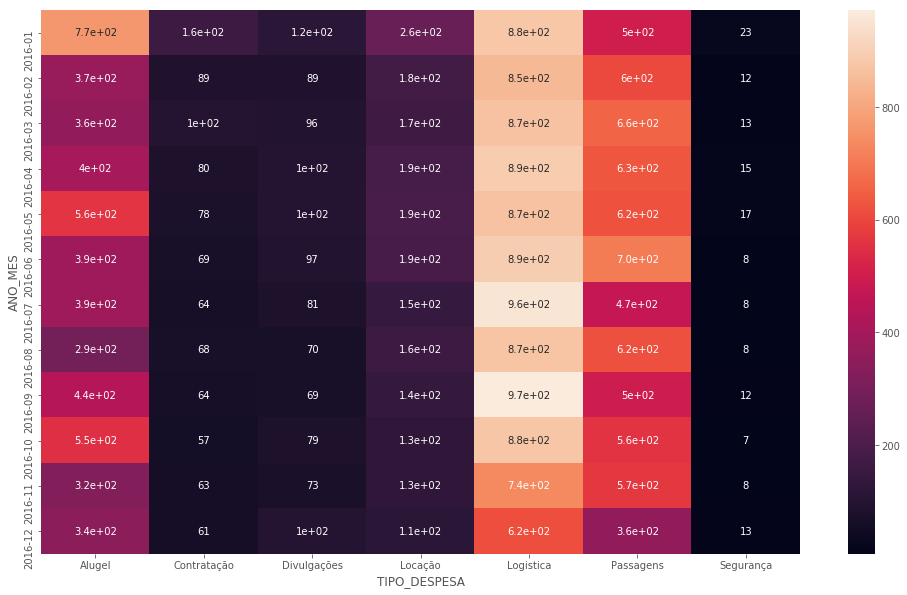

In [166]:
plt.figure(figsize=(17,10))
sns.heatmap(pivot_df,annot = True)